## Columnの説明

### BureauのColumn

* SK_ID_CURR

ID of loan in Home Credit Group's sample
* SK_ID_BUREAU

Recorded ID of credit bureau credit
* CREDIT_ACTIVE

Status of the credit bureau reported credits
* CREDIT_CURRENCY

Recorded currency
* DAYS_CREDIT

How many days before current application did client apply for Credit Bureau credit
* CREDIT_DAY_OVERDUE

Number of days past due on CB credit at the time of application to the Home Credit 
* DAYS_CREDIT_ENDDATE

Remaining duration of CB credit at the time of application in Home Credit
* DAYS_ENDDATE_FACT

Days since CB credit ended at the time of application in Home Credit
* AMT_CREDIT_MAX_OVERDUE

Maximum amount of overdue
* CNT_CREDIT_PROLONG

* AMT_CREDIT_SUM

* AMT_CREDIT_SUM_DEBT

* AMT_CREDIT_SUM_LIMIT

* AMT_CREDIT_SUM_OVERDUE

* CREDIT_TYPE

* DAYS_CREDIT_UPDATE

* AMT_ANNUITY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE

In [2]:
br_path = "../data/bureau.csv"
bb_path = "../data/bureau_balance.csv"

br = pd.read_csv(br_path)
bb = pd.read_csv(bb_path)

br.shape, bb.shape

((1716428, 17), (27299925, 3))

In [20]:
bb.head(50)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [56]:
sample = br[br["SK_ID_BUREAU"] == 5715451]
sample

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
770,380361,5715451,Closed,currency 1,-917,0,-187.0,-759.0,NaN,0,74439.0,0.0,0.0,0.0,Consumer credit,-748,0.0


In [57]:
 sample["DAYS_CREDIT_ENDDATE"] - sample["DAYS_CREDIT"]

770    730.0
dtype: float64

## Annuityとは？



月々の返済額らしい  
ホントか？

97


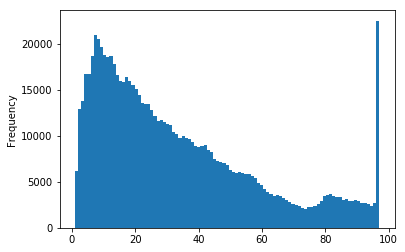

In [53]:
%matplotlib inline
counts = bb.groupby("SK_ID_BUREAU")["SK_ID_BUREAU"].value_counts()
fig = counts.plot(kind="hist", bins=97)
plt.savefig("../figure/bureau_balance_histogram.png")
print(counts.max())

In [81]:
overdue = br[br["CREDIT_DAY_OVERDUE"] > 0]
id_bureau = overdue["SK_ID_BUREAU"].reset_index(drop=True)

bb[bb["SK_ID_BUREAU"] == id_bureau[28]]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS


In [97]:
id_bad_debt = overdue[overdue.CREDIT_ACTIVE == 'Bad debt']["SK_ID_BUREAU"].reset_index(drop=True)
bb[bb.SK_ID_BUREAU == id_bad_debt[3]]

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
16144030,5499851,0,X
16144031,5499851,-1,X
16144032,5499851,-2,X
16144033,5499851,-3,X
16144034,5499851,-4,X
16144035,5499851,-5,X
16144036,5499851,-6,X
16144037,5499851,-7,X
16144038,5499851,-8,X
16144039,5499851,-9,X


In [98]:
br[br.SK_ID_BUREAU == id_bad_debt[3]]

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
711352,186360,5499851,Bad debt,currency 1,-1218,366,-852.0,NaN,NaN,0,121275.0,0.0,NaN,0.0,Consumer credit,-1035,NaN


## How many bureau credits do people have

(64,)


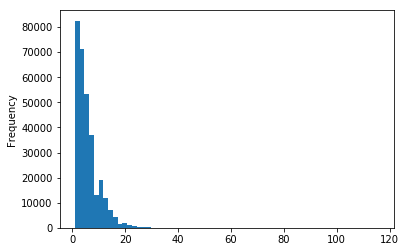

In [103]:
%matplotlib inline
num_bureau_per_person = br.groupby("SK_ID_CURR")["SK_ID_CURR"].value_counts()
num_bureau_per_person.plot(kind="hist", bins=64)
print(num_bureau_per_person.unique().shape)

In [111]:
id_many_bureau = num_bureau_per_person[num_bureau_per_person == 116]
id_many_bureau

SK_ID_CURR  SK_ID_CURR
120860      120860        116
Name: SK_ID_CURR, dtype: int64

In [119]:
num_bureau_per_person.value_counts()

1      41520
2      41004
3      37828
4      33467
5      28913
6      24329
7      20095
8      16736
9      13073
10     10518
11      8456
12      6564
13      5144
14      4129
15      3061
16      2394
17      1969
18      1513
19      1133
20       886
21       682
22       545
23       381
24       304
25       217
26       200
27       142
28       135
29        88
32        60
       ...  
36        22
38        19
35        18
37        13
41        10
40        10
39         9
47         8
45         5
44         4
55         4
42         3
49         3
50         3
43         3
54         3
48         2
51         2
58         1
78         1
61         1
60         1
59         1
53         1
57         1
56         1
52         1
94         1
46         1
116        1
Name: SK_ID_CURR, Length: 64, dtype: int64